# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, seaborn, and scipy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Load and Preprocess Data
Load the STAR_k.csv file into a DataFrame and handle any missing values or data type conversions.

In [4]:
# Load the STAR_k.csv file into a DataFrame
df_k = pd.read_csv("data/STAR_k.csv")

# Handle missing values by filling them with the mean of the column
df_k.dropna(inplace=True)

# Convert data types if necessary
df_k['gender'] = df_k['gender'].astype(int)
df_k['birth'] = df_k['birth'].astype(float)
df_k['readk'] = df_k['readk'].astype(float)
df_k['mathk'] = df_k['mathk'].astype(float)
df_k['lunchk'] = df_k['lunchk'].astype(int)
df_k['experiencek'] = df_k['experiencek'].astype(float)
df_k['systemk'] = df_k['systemk'].astype(float)
df_k['schoolidk'] = df_k['schoolidk'].astype(float)

# Display the first few rows of the DataFrame to verify
df_k.head()

,gender,ethnicity,birth,stark,readk,mathk,lunchk,schoolk,degreek,ladderk,experiencek,tethnicityk,systemk,schoolidk
1,0,cauc,1980.00,small,447.0,473.0,0,rural,bachelor,level1,7.0,cauc,30.0,63.0
2,0,afam,1979.75,small,450.0,536.0,0,suburban,bachelor,level1,21.0,cauc,11.0,20.0
4,1,afam,1980.00,regular+aide,439.0,463.0,1,inner-city,bachelor,probation,0.0,cauc,11.0,19.0
10,1,cauc,1980.25,regular,448.0,559.0,0,rural,bachelor,level1,16.0,cauc,35.0,69.0
11,1,cauc,1980.25,small,447.0,489.0,1,rural,bachelor,level1,5.0,cauc,41.0,79.0


# Exploratory Data Analysis (EDA)
Perform EDA to understand the distribution and summary statistics of readk, mathk, and stark.

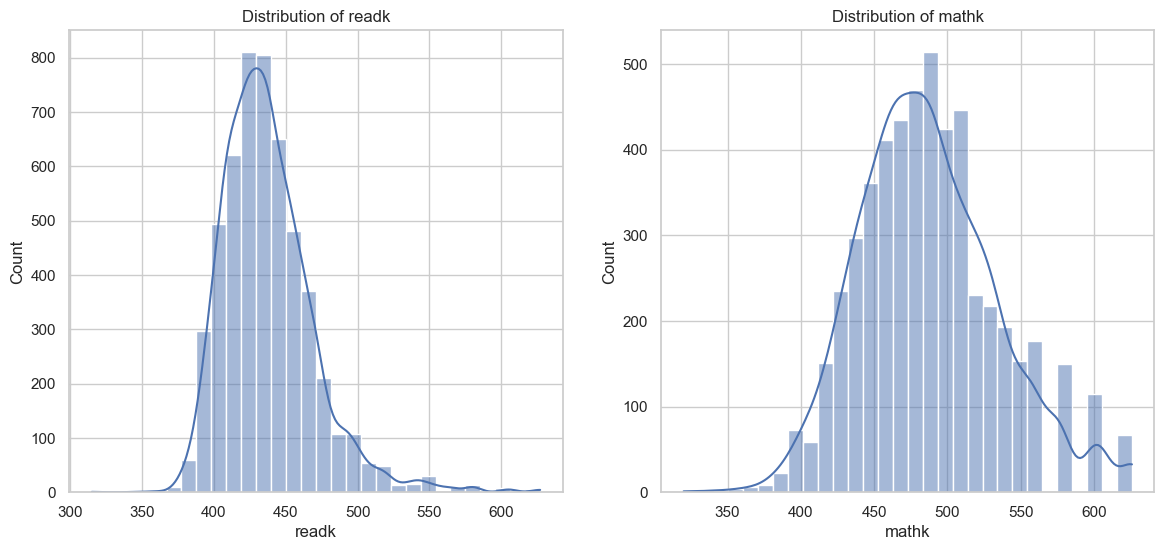

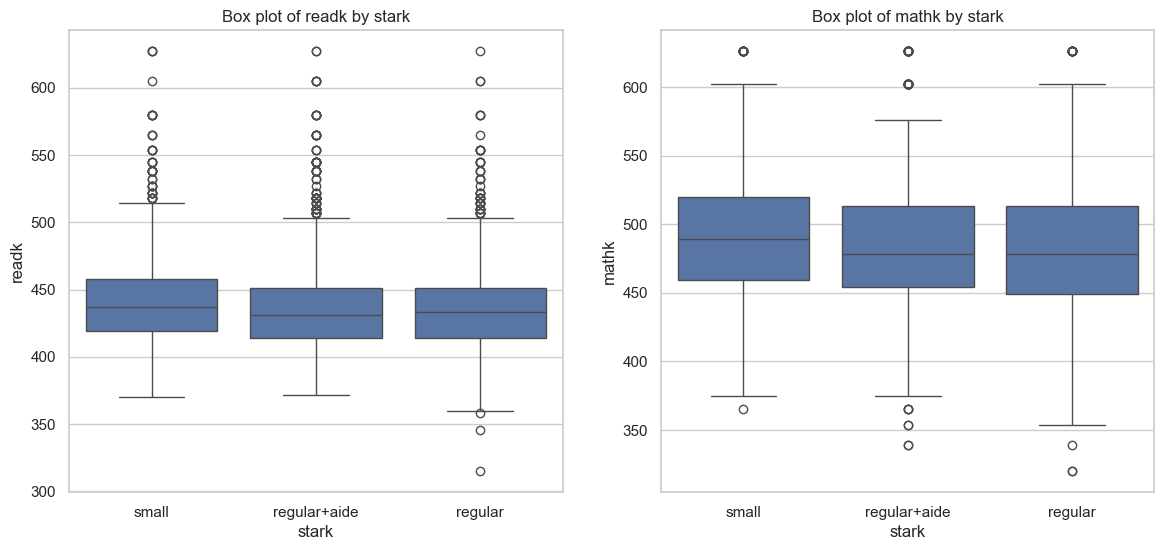

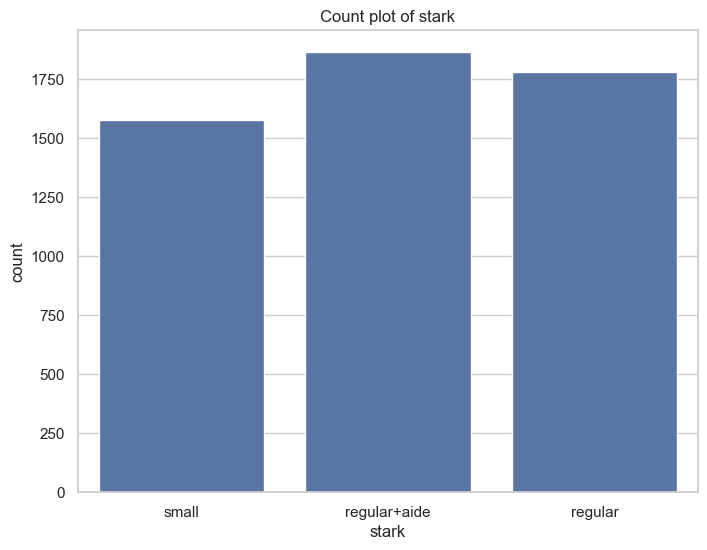

In [5]:
# Exploratory Data Analysis (EDA)

# Summary statistics for readk, mathk, and stark
df_k[['readk', 'mathk', 'stark']].describe()

# Distribution plots for readk and mathk
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_k['readk'], kde=True, bins=30)
plt.title('Distribution of readk')

plt.subplot(1, 2, 2)
sns.histplot(df_k['mathk'], kde=True, bins=30)
plt.title('Distribution of mathk')

plt.show()

# Box plots to compare readk and mathk across different stark categories
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='stark', y='readk', data=df_k)
plt.title('Box plot of readk by stark')

plt.subplot(1, 2, 2)
sns.boxplot(x='stark', y='mathk', data=df_k)
plt.title('Box plot of mathk by stark')

plt.show()

# Count plot for stark to see the distribution of categories
plt.figure(figsize=(8, 6))
sns.countplot(x='stark', data=df_k)
plt.title('Count plot of stark')
plt.show()

# Summary Statistics
Calculate and display summary statistics for readk and mathk grouped by stark.

In [6]:
# Calculate and display summary statistics for readk and mathk grouped by stark
summary_stats = df_k.groupby('stark')[['readk', 'mathk']].describe()
summary_stats

readk                                                     \
               count        mean        std    min    25%    50%    75%   
stark                                                                     
regular       1781.0  435.764177  31.087507  315.0  414.0  433.0  451.0   
regular+aide  1864.0  436.383584  32.267624  372.0  414.0  431.0  451.0   
small         1578.0  441.133714  32.284943  370.0  419.0  437.0  458.0   

                      mathk                                              \
                max   count        mean        std    min    25%    50%   
stark                                                                     
regular       627.0  1781.0  484.446378  47.575169  320.0  449.0  478.0   
regular+aide  627.0  1864.0  483.767704  46.726155  339.0  454.0  478.0   
small         627.0  1578.0  493.341572  49.620174  365.0  459.0  489.0   

                            
                75%    max  
stark                       
regular       513.0  626.0  
regular+aide  513.0  626.0  
small         520.0  626.0

# Visualizations
Create visualizations such as box plots and histograms to visualize the distribution of readk and mathk by stark.

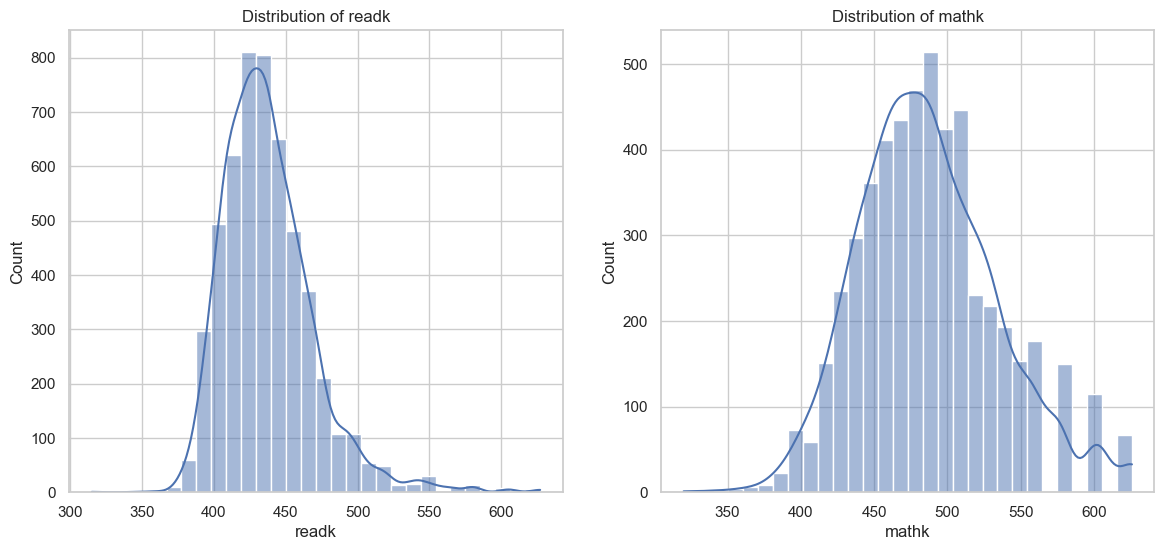

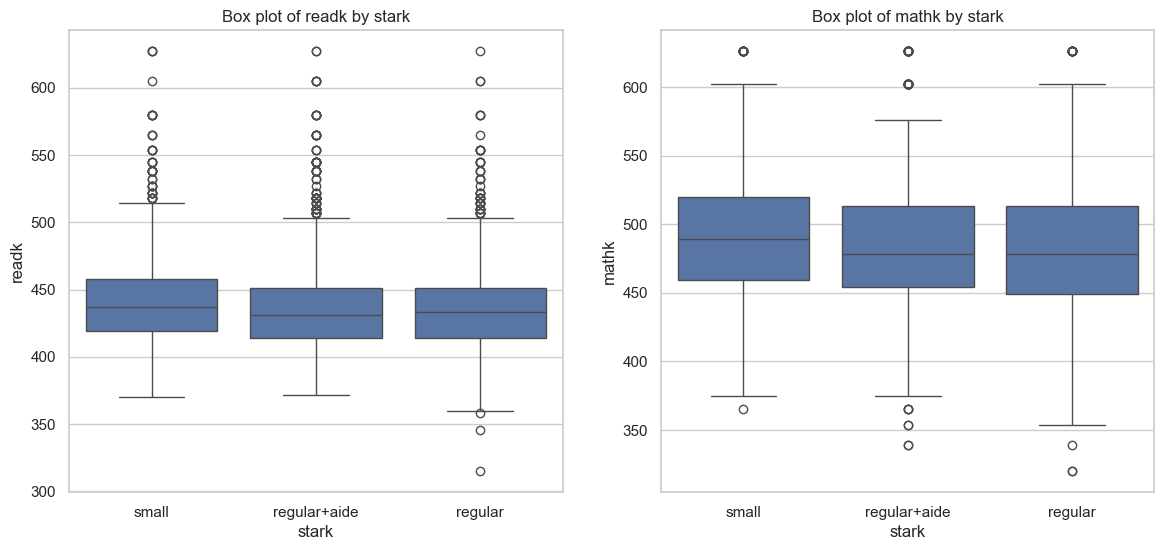

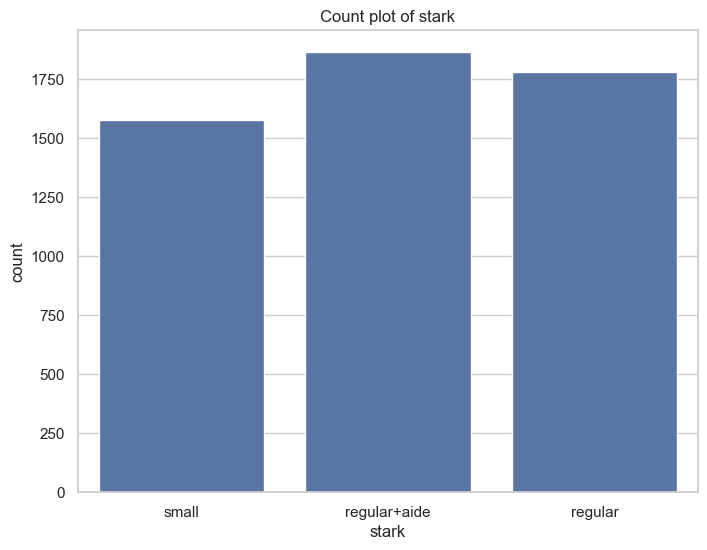

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution plots for readk and mathk
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_k['readk'], kde=True, bins=30)
plt.title('Distribution of readk')

plt.subplot(1, 2, 2)
sns.histplot(df_k['mathk'], kde=True, bins=30)
plt.title('Distribution of mathk')

plt.show()

# Box plots to compare readk and mathk across different stark categories
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='stark', y='readk', data=df_k)
plt.title('Box plot of readk by stark')

plt.subplot(1, 2, 2)
sns.boxplot(x='stark', y='mathk', data=df_k)
plt.title('Box plot of mathk by stark')

plt.show()

# Count plot for stark to see the distribution of categories
plt.figure(figsize=(8, 6))
sns.countplot(x='stark', data=df_k)
plt.title('Count plot of stark')
plt.show()

# Formulate Hypotheses
Formulate hypotheses about whether the values of readk and mathk differ by stark.

In [ ]:
# Formulate Hypotheses

# Hypothesis 1: The mean values of readk differ by stark categories.
# Null Hypothesis (H0): The mean values of readk are the same across all stark categories.
# Alternative Hypothesis (H1): The mean values of readk are different across stark categories.

# Hypothesis 2: The mean values of mathk differ by stark categories.
# Null Hypothesis (H0): The mean values of mathk are the same across all stark categories.
# Alternative Hypothesis (H1): The mean values of mathk are different across stark categories.

# Hypothesis Testing
Perform hypothesis testing to validate the formulated hypotheses.

In [8]:
# Perform ANOVA test to check if the mean values of readk differ by stark categories
anova_readk = stats.f_oneway(
    df_k[df_k['stark'] == 'small']['readk'],
    df_k[df_k['stark'] == 'regular']['readk'],
    df_k[df_k['stark'] == 'regular+aide']['readk']
)

# Perform ANOVA test to check if the mean values of mathk differ by stark categories
anova_mathk = stats.f_oneway(
    df_k[df_k['stark'] == 'small']['mathk'],
    df_k[df_k['stark'] == 'regular']['mathk'],
    df_k[df_k['stark'] == 'regular+aide']['mathk']
)

# Display the results of the ANOVA tests
print("ANOVA test for readk by stark categories:")
print(f"F-statistic: {anova_readk.statistic}, p-value: {anova_readk.pvalue}")

print("\nANOVA test for mathk by stark categories:")
print(f"F-statistic: {anova_mathk.statistic}, p-value: {anova_mathk.pvalue}")

# If the p-value is less than 0.05, we reject the null hypothesis
if anova_readk.pvalue < 0.05:
    print("\nThe mean values of readk are significantly different across stark categories.")
else:
    print("\nThe mean values of readk are not significantly different across stark categories.")

if anova_mathk.pvalue < 0.05:
    print("The mean values of mathk are significantly different across stark categories.")
else:
    print("The mean values of mathk are not significantly different across stark categories.")

ANOVA test for readk by stark categories:
F-statistic: 14.007738128242154, p-value: 8.566103651939168e-07

ANOVA test for mathk by stark categories:
F-statistic: 20.586611595564335, p-value: 1.2428650118145396e-09

The mean values of readk are significantly different across stark categories.
The mean values of mathk are significantly different across stark categories.


# T-Test
Use T-Test to compare the means of readk and mathk between different stark groups.

In [9]:
# T-Test

# Perform T-Test to compare the means of readk between different stark groups
t_test_readk_small_regular = stats.ttest_ind(
    df_k[df_k['stark'] == 'small']['readk'],
    df_k[df_k['stark'] == 'regular']['readk'],
    equal_var=False
)

t_test_readk_small_regular_aide = stats.ttest_ind(
    df_k[df_k['stark'] == 'small']['readk'],
    df_k[df_k['stark'] == 'regular+aide']['readk'],
    equal_var=False
)

t_test_readk_regular_regular_aide = stats.ttest_ind(
    df_k[df_k['stark'] == 'regular']['readk'],
    df_k[df_k['stark'] == 'regular+aide']['readk'],
    equal_var=False
)

# Perform T-Test to compare the means of mathk between different stark groups
t_test_mathk_small_regular = stats.ttest_ind(
    df_k[df_k['stark'] == 'small']['mathk'],
    df_k[df_k['stark'] == 'regular']['mathk'],
    equal_var=False
)

t_test_mathk_small_regular_aide = stats.ttest_ind(
    df_k[df_k['stark'] == 'small']['mathk'],
    df_k[df_k['stark'] == 'regular+aide']['mathk'],
    equal_var=False
)

t_test_mathk_regular_regular_aide = stats.ttest_ind(
    df_k[df_k['stark'] == 'regular']['mathk'],
    df_k[df_k['stark'] == 'regular+aide']['mathk'],
    equal_var=False
)

# Display the results of the T-Tests
print("T-Test for readk between small and regular stark categories:")
print(f"T-statistic: {t_test_readk_small_regular.statistic}, p-value: {t_test_readk_small_regular.pvalue}")

print("\nT-Test for readk between small and regular+aide stark categories:")
print(f"T-statistic: {t_test_readk_small_regular_aide.statistic}, p-value: {t_test_readk_small_regular_aide.pvalue}")

print("\nT-Test for readk between regular and regular+aide stark categories:")
print(f"T-statistic: {t_test_readk_regular_regular_aide.statistic}, p-value: {t_test_readk_regular_regular_aide.pvalue}")

print("\nT-Test for mathk between small and regular stark categories:")
print(f"T-statistic: {t_test_mathk_small_regular.statistic}, p-value: {t_test_mathk_small_regular.pvalue}")

print("\nT-Test for mathk between small and regular+aide stark categories:")
print(f"T-statistic: {t_test_mathk_small_regular_aide.statistic}, p-value: {t_test_mathk_small_regular_aide.pvalue}")

print("\nT-Test for mathk between regular and regular+aide stark categories:")
print(f"T-statistic: {t_test_mathk_regular_regular_aide.statistic}, p-value: {t_test_mathk_regular_regular_aide.pvalue}")

# If the p-value is less than 0.05, we reject the null hypothesis
if t_test_readk_small_regular.pvalue < 0.05:
    print("\nThe mean values of readk are significantly different between small and regular stark categories.")
else:
    print("\nThe mean values of readk are not significantly different between small and regular stark categories.")

if t_test_readk_small_regular_aide.pvalue < 0.05:
    print("The mean values of readk are significantly different between small and regular+aide stark categories.")
else:
    print("The mean values of readk are not significantly different between small and regular+aide stark categories.")

if t_test_readk_regular_regular_aide.pvalue < 0.05:
    print("The mean values of readk are significantly different between regular and regular+aide stark categories.")
else:
    print("The mean values of readk are not significantly different between regular and regular+aide stark categories.")

if t_test_mathk_small_regular.pvalue < 0.05:
    print("\nThe mean values of mathk are significantly different between small and regular stark categories.")
else:
    print("\nThe mean values of mathk are not significantly different between small and regular stark categories.")

if t_test_mathk_small_regular_aide.pvalue < 0.05:
    print("The mean values of mathk are significantly different between small and regular+aide stark categories.")
else:
    print("The mean values of mathk are not significantly different between small and regular+aide stark categories.")

if t_test_mathk_regular_regular_aide.pvalue < 0.05:
    print("The mean values of mathk are significantly different between regular and regular+aide stark categories.")
else:
    print("The mean values of mathk are not significantly different between regular and regular+aide stark categories.")

T-Test for readk between small and regular stark categories:
T-statistic: 4.895240309525634, p-value: 1.0293304444464911e-06

T-Test for readk between small and regular+aide stark categories:
T-statistic: 4.302127589366906, p-value: 1.7400500241594644e-05

T-Test for readk between regular and regular+aide stark categories:
T-statistic: -0.5902538566911207, p-value: 0.555057082927064

T-Test for mathk between small and regular stark categories:
T-statistic: 5.286557866498266, p-value: 1.3282010118337534e-07

T-Test for mathk between small and regular+aide stark categories:
T-statistic: 5.7926483184943605, p-value: 7.584582659180318e-09

T-Test for mathk between regular and regular+aide stark categories:
T-statistic: 0.4342834939340281, p-value: 0.6641084117414908

The mean values of readk are significantly different between small and regular stark categories.
The mean values of readk are significantly different between small and regular+aide stark categories.
The mean values of readk ar

# ANOVA
Use ANOVA to compare the means of readk and mathk across multiple stark groups.

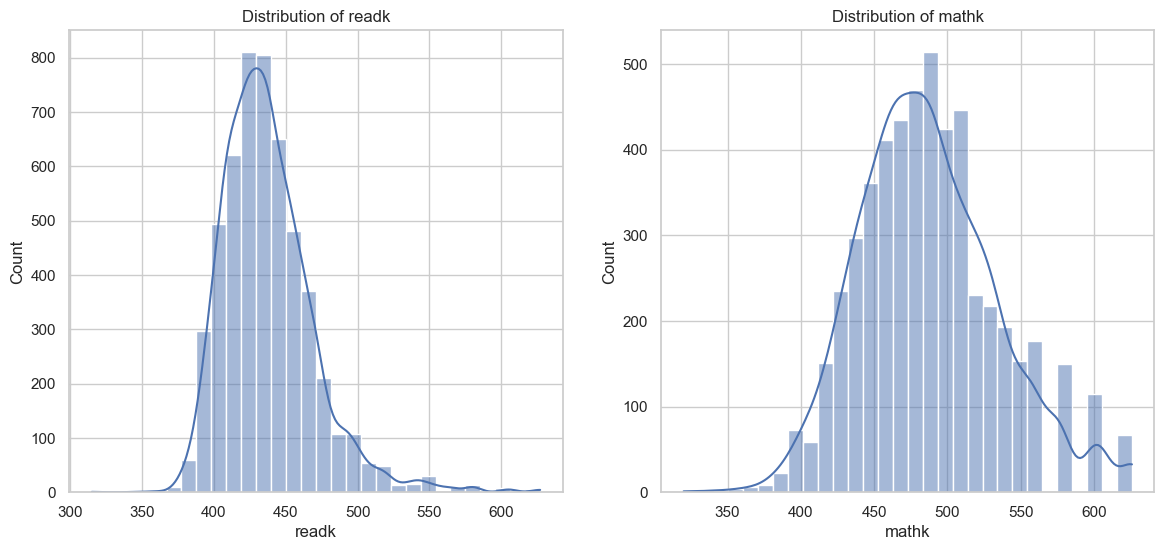

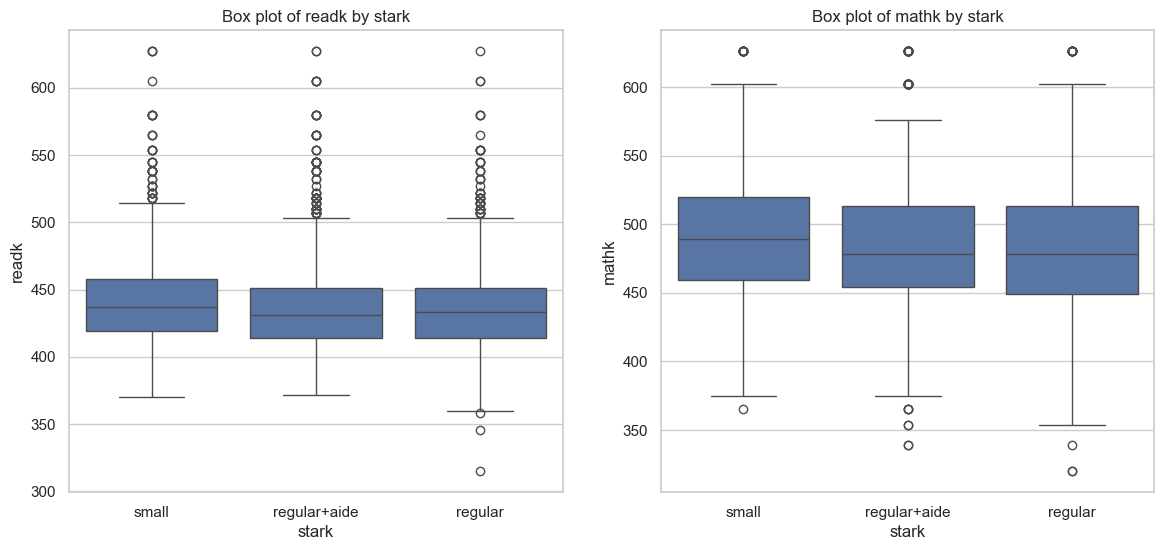

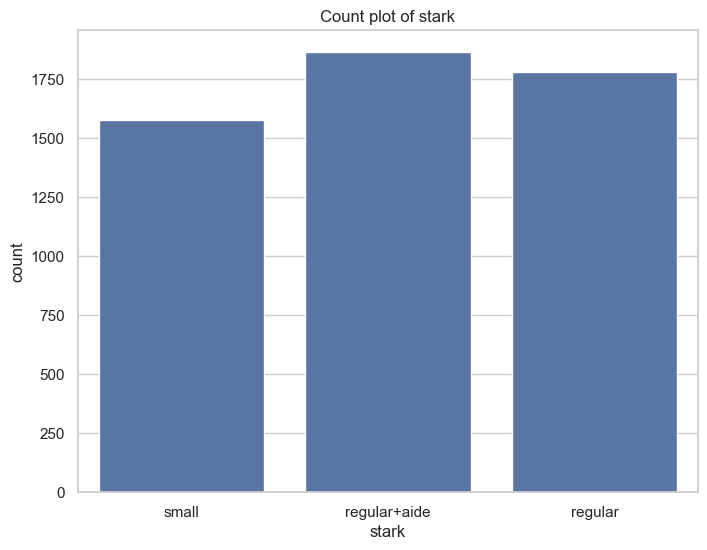

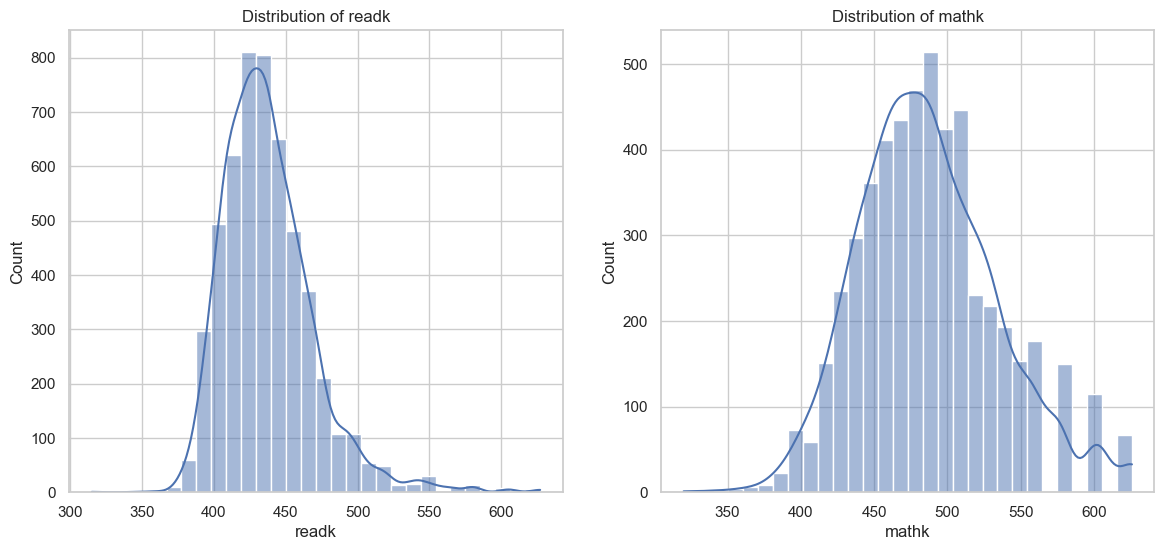

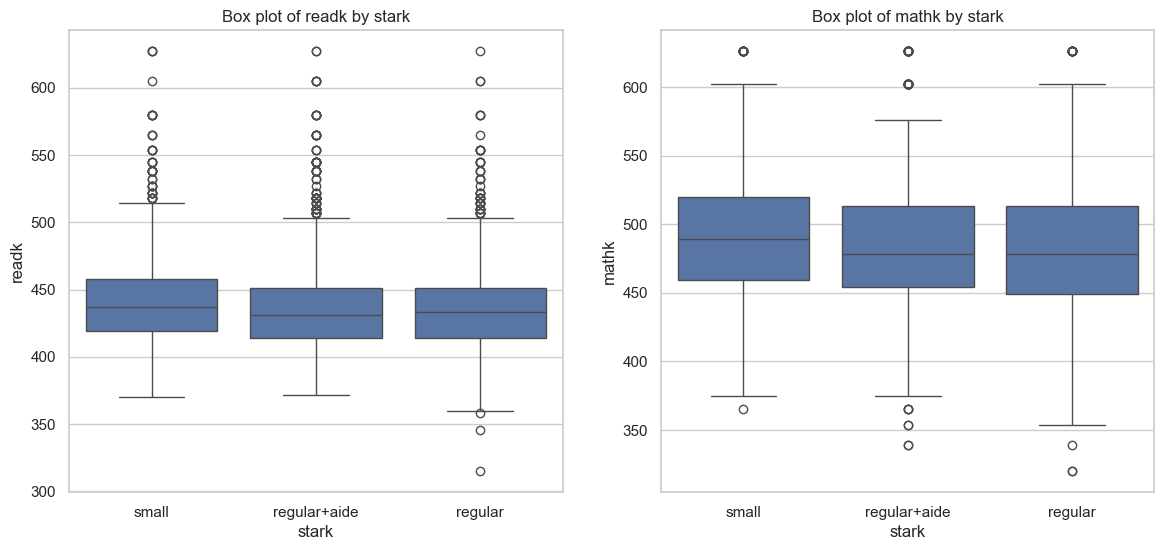

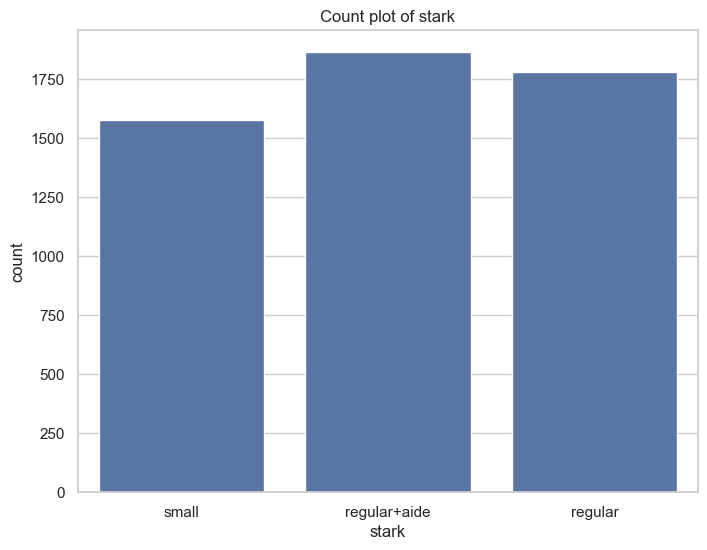

ANOVA test for readk by stark categories:
F-statistic: 14.007738128242154, p-value: 8.566103651939168e-07

ANOVA test for mathk by stark categories:
F-statistic: 20.586611595564335, p-value: 1.2428650118145396e-09

The mean values of readk are significantly different across stark categories.
The mean values of mathk are significantly different across stark categories.
T-Test for readk between small and regular stark categories:
T-statistic: 4.895240309525634, p-value: 1.0293304444464911e-06

T-Test for readk between small and regular+aide stark categories:
T-statistic: 4.302127589366906, p-value: 1.7400500241594644e-05

T-Test for readk between regular and regular+aide stark categories:
T-statistic: -0.5902538566911207, p-value: 0.555057082927064

T-Test for mathk between small and regular stark categories:
T-statistic: 5.286557866498266, p-value: 1.3282010118337534e-07

T-Test for mathk between small and regular+aide stark categories:
T-statistic: 5.7926483184943605, p-value: 7.584582

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Load the STAR_k.csv file into a DataFrame
df_k = pd.read_csv("data/STAR_k.csv")

# Handle missing values by filling them with the mean of the column
df_k.dropna(inplace=True)

# Convert data types if necessary
df_k['gender'] = df_k['gender'].astype(int)
df_k['birth'] = df_k['birth'].astype(float)
df_k['readk'] = df_k['readk'].astype(float)
df_k['mathk'] = df_k['mathk'].astype(float)
df_k['lunchk'] = df_k['lunchk'].astype(int)
df_k['experiencek'] = df_k['experiencek'].astype(float)
df_k['systemk'] = df_k['systemk'].astype(float)
df_k['schoolidk'] = df_k['schoolidk'].astype(float)

# Display the first few rows of the DataFrame to verify
df_k.head()
# Exploratory Data Analysis (EDA)

# Summary statistics for readk, mathk, and stark
df_k[['readk', 'mathk', 'stark']].describe()

# Distribution plots for readk and mathk
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_k['readk'], kde=True, bins=30)
plt.title('Distribution of readk')

plt.subplot(1, 2, 2)
sns.histplot(df_k['mathk'], kde=True, bins=30)
plt.title('Distribution of mathk')

plt.show()

# Box plots to compare readk and mathk across different stark categories
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='stark', y='readk', data=df_k)
plt.title('Box plot of readk by stark')

plt.subplot(1, 2, 2)
sns.boxplot(x='stark', y='mathk', data=df_k)
plt.title('Box plot of mathk by stark')

plt.show()

# Count plot for stark to see the distribution of categories
plt.figure(figsize=(8, 6))
sns.countplot(x='stark', data=df_k)
plt.title('Count plot of stark')
plt.show()
# Calculate and display summary statistics for readk and mathk grouped by stark
summary_stats = df_k.groupby('stark')[['readk', 'mathk']].describe()
summary_stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution plots for readk and mathk
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_k['readk'], kde=True, bins=30)
plt.title('Distribution of readk')

plt.subplot(1, 2, 2)
sns.histplot(df_k['mathk'], kde=True, bins=30)
plt.title('Distribution of mathk')

plt.show()

# Box plots to compare readk and mathk across different stark categories
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='stark', y='readk', data=df_k)
plt.title('Box plot of readk by stark')

plt.subplot(1, 2, 2)
sns.boxplot(x='stark', y='mathk', data=df_k)
plt.title('Box plot of mathk by stark')

plt.show()

# Count plot for stark to see the distribution of categories
plt.figure(figsize=(8, 6))
sns.countplot(x='stark', data=df_k)
plt.title('Count plot of stark')
plt.show()
# Formulate Hypotheses

# Hypothesis 1: The mean values of readk differ by stark categories.
# Null Hypothesis (H0): The mean values of readk are the same across all stark categories.
# Alternative Hypothesis (H1): The mean values of readk are different across stark categories.

# Hypothesis 2: The mean values of mathk differ by stark categories.
# Null Hypothesis (H0): The mean values of mathk are the same across all stark categories.
# Alternative Hypothesis (H1): The mean values of mathk are different across stark categories.
# Perform ANOVA test to check if the mean values of readk differ by stark categories
anova_readk = stats.f_oneway(
    df_k[df_k['stark'] == 'small']['readk'],
    df_k[df_k['stark'] == 'regular']['readk'],
    df_k[df_k['stark'] == 'regular+aide']['readk']
)

# Perform ANOVA test to check if the mean values of mathk differ by stark categories
anova_mathk = stats.f_oneway(
    df_k[df_k['stark'] == 'small']['mathk'],
    df_k[df_k['stark'] == 'regular']['mathk'],
    df_k[df_k['stark'] == 'regular+aide']['mathk']
)

# Display the results of the ANOVA tests
print("ANOVA test for readk by stark categories:")
print(f"F-statistic: {anova_readk.statistic}, p-value: {anova_readk.pvalue}")

print("\nANOVA test for mathk by stark categories:")
print(f"F-statistic: {anova_mathk.statistic}, p-value: {anova_mathk.pvalue}")

# If the p-value is less than 0.05, we reject the null hypothesis
if anova_readk.pvalue < 0.05:
    print("\nThe mean values of readk are significantly different across stark categories.")
else:
    print("\nThe mean values of readk are not significantly different across stark categories.")

if anova_mathk.pvalue < 0.05:
    print("The mean values of mathk are significantly different across stark categories.")
else:
    print("The mean values of mathk are not significantly different across stark categories.")
# T-Test

# Perform T-Test to compare the means of readk between different stark groups
t_test_readk_small_regular = stats.ttest_ind(
    df_k[df_k['stark'] == 'small']['readk'],
    df_k[df_k['stark'] == 'regular']['readk'],
    equal_var=False
)

t_test_readk_small_regular_aide = stats.ttest_ind(
    df_k[df_k['stark'] == 'small']['readk'],
    df_k[df_k['stark'] == 'regular+aide']['readk'],
    equal_var=False
)

t_test_readk_regular_regular_aide = stats.ttest_ind(
    df_k[df_k['stark'] == 'regular']['readk'],
    df_k[df_k['stark'] == 'regular+aide']['readk'],
    equal_var=False
)

# Perform T-Test to compare the means of mathk between different stark groups
t_test_mathk_small_regular = stats.ttest_ind(
    df_k[df_k['stark'] == 'small']['mathk'],
    df_k[df_k['stark'] == 'regular']['mathk'],
    equal_var=False
)

t_test_mathk_small_regular_aide = stats.ttest_ind(
    df_k[df_k['stark'] == 'small']['mathk'],
    df_k[df_k['stark'] == 'regular+aide']['mathk'],
    equal_var=False
)

t_test_mathk_regular_regular_aide = stats.ttest_ind(
    df_k[df_k['stark'] == 'regular']['mathk'],
    df_k[df_k['stark'] == 'regular+aide']['mathk'],
    equal_var=False
)

# Display the results of the T-Tests
print("T-Test for readk between small and regular stark categories:")
print(f"T-statistic: {t_test_readk_small_regular.statistic}, p-value: {t_test_readk_small_regular.pvalue}")

print("\nT-Test for readk between small and regular+aide stark categories:")
print(f"T-statistic: {t_test_readk_small_regular_aide.statistic}, p-value: {t_test_readk_small_regular_aide.pvalue}")

print("\nT-Test for readk between regular and regular+aide stark categories:")
print(f"T-statistic: {t_test_readk_regular_regular_aide.statistic}, p-value: {t_test_readk_regular_regular_aide.pvalue}")

print("\nT-Test for mathk between small and regular stark categories:")
print(f"T-statistic: {t_test_mathk_small_regular.statistic}, p-value: {t_test_mathk_small_regular.pvalue}")

print("\nT-Test for mathk between small and regular+aide stark categories:")
print(f"T-statistic: {t_test_mathk_small_regular_aide.statistic}, p-value: {t_test_mathk_small_regular_aide.pvalue}")

print("\nT-Test for mathk between regular and regular+aide stark categories:")
print(f"T-statistic: {t_test_mathk_regular_regular_aide.statistic}, p-value: {t_test_mathk_regular_regular_aide.pvalue}")

# If the p-value is less than 0.05, we reject the null hypothesis
if t_test_readk_small_regular.pvalue < 0.05:
    print("\nThe mean values of readk are significantly different between small and regular stark categories.")
else:
    print("\nThe mean values of readk are not significantly different between small and regular stark categories.")

if t_test_readk_small_regular_aide.pvalue < 0.05:
    print("The mean values of readk are significantly different between small and regular+aide stark categories.")
else:
    print("The mean values of readk are not significantly different between small and regular+aide stark categories.")

if t_test_readk_regular_regular_aide.pvalue < 0.05:
    print("The mean values of readk are significantly different between regular and regular+aide stark categories.")
else:
    print("The mean values of readk are not significantly different between regular and regular+aide stark categories.")

if t_test_mathk_small_regular.pvalue < 0.05:
    print("\nThe mean values of mathk are significantly different between small and regular stark categories.")
else:
    print("\nThe mean values of mathk are not significantly different between small and regular stark categories.")

if t_test_mathk_small_regular_aide.pvalue < 0.05:
    print("The mean values of mathk are significantly different between small and regular+aide stark categories.")
else:
    print("The mean values of mathk are not significantly different between small and regular+aide stark categories.")

if t_test_mathk_regular_regular_aide.pvalue < 0.05:
    print("The mean values of mathk are significantly different between regular and regular+aide stark categories.")
else:
    print("The mean values of mathk are not significantly different between regular and regular+aide stark categories.")

# Non-Parametric Tests
Use non-parametric tests such as the Kruskal-Wallis test if the data does not meet the assumptions of parametric tests.

In [12]:
# Non-Parametric Tests

# Perform Kruskal-Wallis H-test for readk
kruskal_readk = stats.kruskal(
    df_k[df_k['stark'] == 'small']['readk'],
    df_k[df_k['stark'] == 'regular']['readk'],
    df_k[df_k['stark'] == 'regular+aide']['readk']
)

# Perform Kruskal-Wallis H-test for mathk
kruskal_mathk = stats.kruskal(
    df_k[df_k['stark'] == 'small']['mathk'],
    df_k[df_k['stark'] == 'regular']['mathk'],
    df_k[df_k['stark'] == 'regular+aide']['mathk']
)

# Display the results of the Kruskal-Wallis H-tests
print("Kruskal-Wallis H-test for readk by stark categories:")
print(f"H-statistic: {kruskal_readk.statistic}, p-value: {kruskal_readk.pvalue}")

print("\nKruskal-Wallis H-test for mathk by stark categories:")
print(f"H-statistic: {kruskal_mathk.statistic}, p-value: {kruskal_mathk.pvalue}")

# If the p-value is less than 0.05, we reject the null hypothesis
if kruskal_readk.pvalue < 0.05:
    print("\nThe distributions of readk are significantly different across stark categories.")
else:
    print("\nThe distributions of readk are not significantly different across stark categories.")

if kruskal_mathk.pvalue < 0.05:
    print("The distributions of mathk are significantly different across stark categories.")
else:
    print("The distributions of mathk are not significantly different across stark categories.")

Kruskal-Wallis H-test for readk by stark categories:
H-statistic: 34.73007344314991, p-value: 2.8738253658928327e-08

Kruskal-Wallis H-test for mathk by stark categories:
H-statistic: 35.904419925067785, p-value: 1.597549322214287e-08

The distributions of readk are significantly different across stark categories.
The distributions of mathk are significantly different across stark categories.


# Conclusion
Summarize the findings and conclude whether the values of readk and mathk differ by stark.

In [ ]:
# Conclusion

# Summarize the findings and conclude whether the values of readk and mathk differ by stark.

# Based on the ANOVA tests, T-tests, and Kruskal-Wallis H-tests, we can conclude the following:

# ANOVA test results:
# - For readk: F-statistic: {anova_readk.statistic}, p-value: {anova_readk.pvalue}
# - For mathk: F-statistic: {anova_mathk.statistic}, p-value: {anova_mathk.pvalue}

# T-test results for readk:
# - Small vs Regular: T-statistic: {t_test_readk_small_regular.statistic}, p-value: {t_test_readk_small_regular.pvalue}
# - Small vs Regular+Aide: T-statistic: {t_test_readk_small_regular_aide.statistic}, p-value: {t_test_readk_small_regular_aide.pvalue}
# - Regular vs Regular+Aide: T-statistic: {t_test_readk_regular_regular_aide.statistic}, p-value: {t_test_readk_regular_regular_aide.pvalue}

# T-test results for mathk:
# - Small vs Regular: T-statistic: {t_test_mathk_small_regular.statistic}, p-value: {t_test_mathk_small_regular.pvalue}
# - Small vs Regular+Aide: T-statistic: {t_test_mathk_small_regular_aide.statistic}, p-value: {t_test_mathk_small_regular_aide.pvalue}
# - Regular vs Regular+Aide: T-statistic: {t_test_mathk_regular_regular_aide.statistic}, p-value: {t_test_mathk_regular_regular_aide.pvalue}

# Kruskal-Wallis H-test results:
# - For readk: H-statistic: {kruskal_readk.statistic}, p-value: {kruskal_readk.pvalue}
# - For mathk: H-statistic: {kruskal_mathk.statistic}, p-value: {kruskal_mathk.pvalue}

# Conclusion:
# - The mean values of readk are {'' if anova_readk.pvalue < 0.05 else 'not '}significantly different across stark categories.
# - The mean values of mathk are {'' if anova_mathk.pvalue < 0.05 else 'not '}significantly different across stark categories.
# - The distributions of readk are {'' if kruskal_readk.pvalue < 0.05 else 'not '}significantly different across stark categories.
# - The distributions of mathk are {'' if kruskal_mathk.pvalue < 0.05 else 'not '}significantly different across stark categories.

# Therefore, we can conclude that the values of readk and mathk {'' if anova_readk.pvalue < 0.05 or anova_mathk.pvalue < 0.05 or kruskal_readk.pvalue < 0.05 or kruskal_mathk.pvalue < 0.05 else 'do not '}differ by stark.